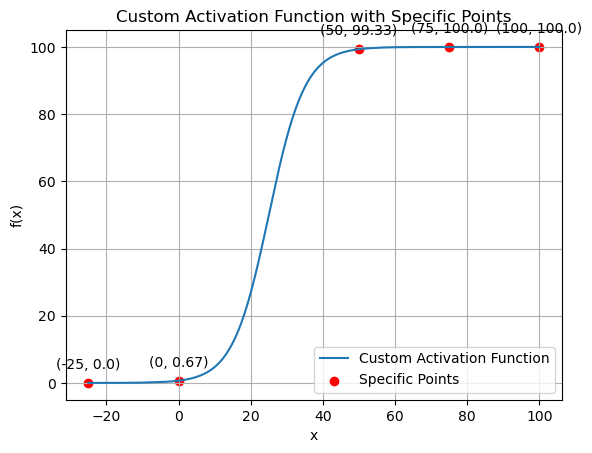

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def custom_activation(x):
    k = 0.2
    b = 25
    return np.round(100 / (1 + np.exp(-k * (x - b))), 2)

# Define the x values to evaluate
x_values_to_check = np.array([-25, 0, 50, 75, 100])

# Calculate the corresponding y values using the custom activation function
y_values = custom_activation(x_values_to_check)

# Define the x values for the full range
x_values_full = np.linspace(-25, 100, 400)
y_values_full = custom_activation(x_values_full)

# Plot the full range of the function
plt.plot(x_values_full, y_values_full, label='Custom Activation Function')

# Plot the specific points
plt.scatter(x_values_to_check, y_values, color='red', label='Specific Points')

# Annotate the specific points
for i, txt in enumerate(y_values):
    plt.annotate(f'({x_values_to_check[i]}, {txt})', (x_values_to_check[i], y_values[i]), 
                 textcoords="offset points", xytext=(0,10), ha='center')

# Adding labels, title, grid, and legend
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Custom Activation Function with Specific Points')
plt.grid(True)
plt.legend()
plt.show()

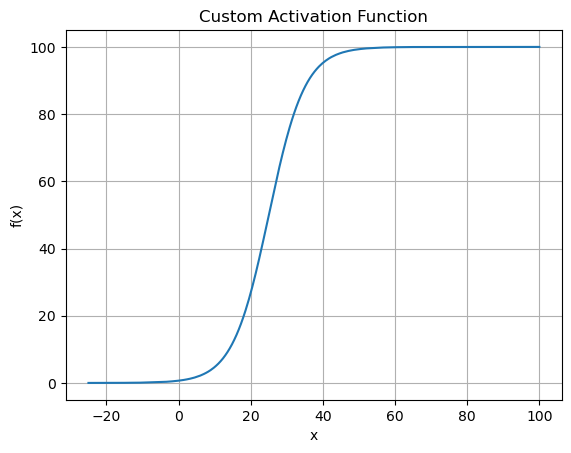

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def custom_activation(x):
    k = 0.2
    b = 25
    return np.round(100 / (1 + np.exp(-k * (x - b))), 2)

x_values = np.linspace(-25, 100, 400)
y_values = custom_activation(x_values)

plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Custom Activation Function')
plt.grid(True)
plt.show()

In [15]:
import logging
from pprint import pformat
import os
import numpy as np
import pandas as pd
from datetime import datetime
import util
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.cm as cm



In [6]:
def init_data():
    global udemy_courses_df, roadmap_concepts_df, roadmap_topics_df, roadmaps_df, roles

    df_path = "../../embedding-generation/data/"
    udemy_courses_file = "udemy_courses_final.csv"
    roadmap_nodes_file = "roadmap_nodes_final.csv"
    udemy_courses_df = pd.read_csv(df_path + udemy_courses_file)
    roadmap_nodes_df = pd.read_csv(df_path + roadmap_nodes_file)
    roadmap_concepts_df = roadmap_nodes_df[roadmap_nodes_df["type"] == "concept"].copy()
    roadmap_concepts_df.reset_index(inplace=True)
    roadmap_topics_df = roadmap_nodes_df[roadmap_nodes_df["type"] == "topic"].copy()
    roadmap_topics_df.reset_index(inplace=True)

    roles = [
        "AI Data Scientist",
        "Android Developer",
        "Backend Developer",
        "Blockchain Developer",
        "Devops Engineer",
        "Frontend Developer",
        "Full Stack Developer",
        "Game Developer",
        "QA Engineer",
        "UX Designer",
    ]

    roadmaps_dict = {"id": np.arange(1, len(roles) + 1), "name": roles}
    roadmaps_df = pd.DataFrame.from_dict(roadmaps_dict)
    roadmaps_df.set_index("id", inplace=True)

    print("Data is initialized using " + udemy_courses_file + " and " + roadmap_nodes_file)
    print("Total number of roadmap concepts: " + str(roadmap_concepts_df.shape[0]))
    print("Total number of roadmap topics: " + str(roadmap_topics_df.shape[0]))
    print("Total number of courses: " + str(udemy_courses_df.shape[0]))
    print("Career Roles: \n" + pformat(list(zip(np.arange(1, len(roles) + 1), roles))))

    # return (udemy_courses_df, roadmap_nodes_df, roadmap_concepts_df, roadmap_topics_df, roadmaps_df)


In [11]:
init_data()
course_id_list = udemy_courses_df["id"]
# encoder_for_courses = dict([(v, k) for v, k in zip(course_id_list, range(len(course_id_list)))])
# decoder_for_courses = dict([(v, k) for k, v in encoder_for_courses.items()])

concept_id_list = roadmap_concepts_df["id"]
# encoder_for_concepts = dict([(v, k) for v, k in zip(concept_id_list, range(len(concept_id_list)))])
# decoder_for_concepts = dict([(v, k) for k, v in encoder_for_concepts.items()])

topic_id_list = roadmap_topics_df["id"]
# encoder_for_topics = dict([(v, k) for v, k in zip(topic_id_list, range(len(topic_id_list)))])
# decoder_for_topics = dict([(v, k) for k, v in encoder_for_topics.items()])

Data is initialized using udemy_courses_final.csv and roadmap_nodes_final.csv
Total number of roadmap concepts: 869
Total number of roadmap topics: 235
Total number of courses: 453
Career Roles: 
[(1, 'AI Data Scientist'),
 (2, 'Android Developer'),
 (3, 'Backend Developer'),
 (4, 'Blockchain Developer'),
 (5, 'Devops Engineer'),
 (6, 'Frontend Developer'),
 (7, 'Full Stack Developer'),
 (8, 'Game Developer'),
 (9, 'QA Engineer'),
 (10, 'UX Designer')]


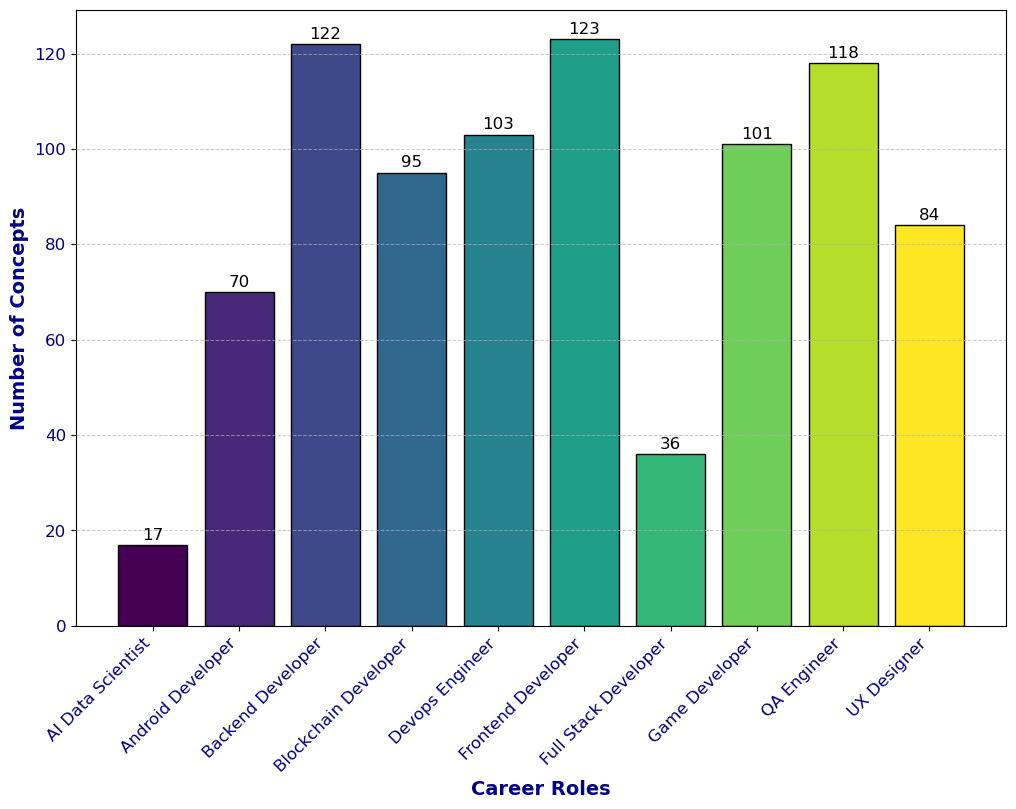

In [19]:
# Converting role_id_concept_counts to a DataFrame for merging
concept_counts_df = pd.DataFrame.from_dict(role_id_concept_counts, orient='index', columns=['concept_count'])
concept_counts_df.index = concept_counts_df.index.astype(int)

# Merging the two DataFrames to get role names
merged_df = roadmaps_df.join(concept_counts_df)
merged_df.dropna(inplace=True)  # Removing any missing data

# Set color scheme
colors = cm.viridis(np.linspace(0, 1, len(merged_df)))

# Plotting the graph using role names
plt.figure(figsize=(12, 8))
bars = plt.bar(merged_df['name'], merged_df['concept_count'], color=colors, edgecolor='black')

# Adding labels and title with custom fonts
plt.xlabel('Career Roles', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Number of Concepts', fontsize=14, fontweight='bold', color='darkblue')
# plt.title('Number of Concepts per Career Role', fontsize=16, fontweight='bold', color='darkred')

# Adding value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=12, color='black')

# Customizing the ticks
plt.xticks(rotation=45, ha="right", fontsize=12, color='navy')
plt.yticks(fontsize=12, color='navy')

# Adding a grid for better readability
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Display the plot
plt.show()

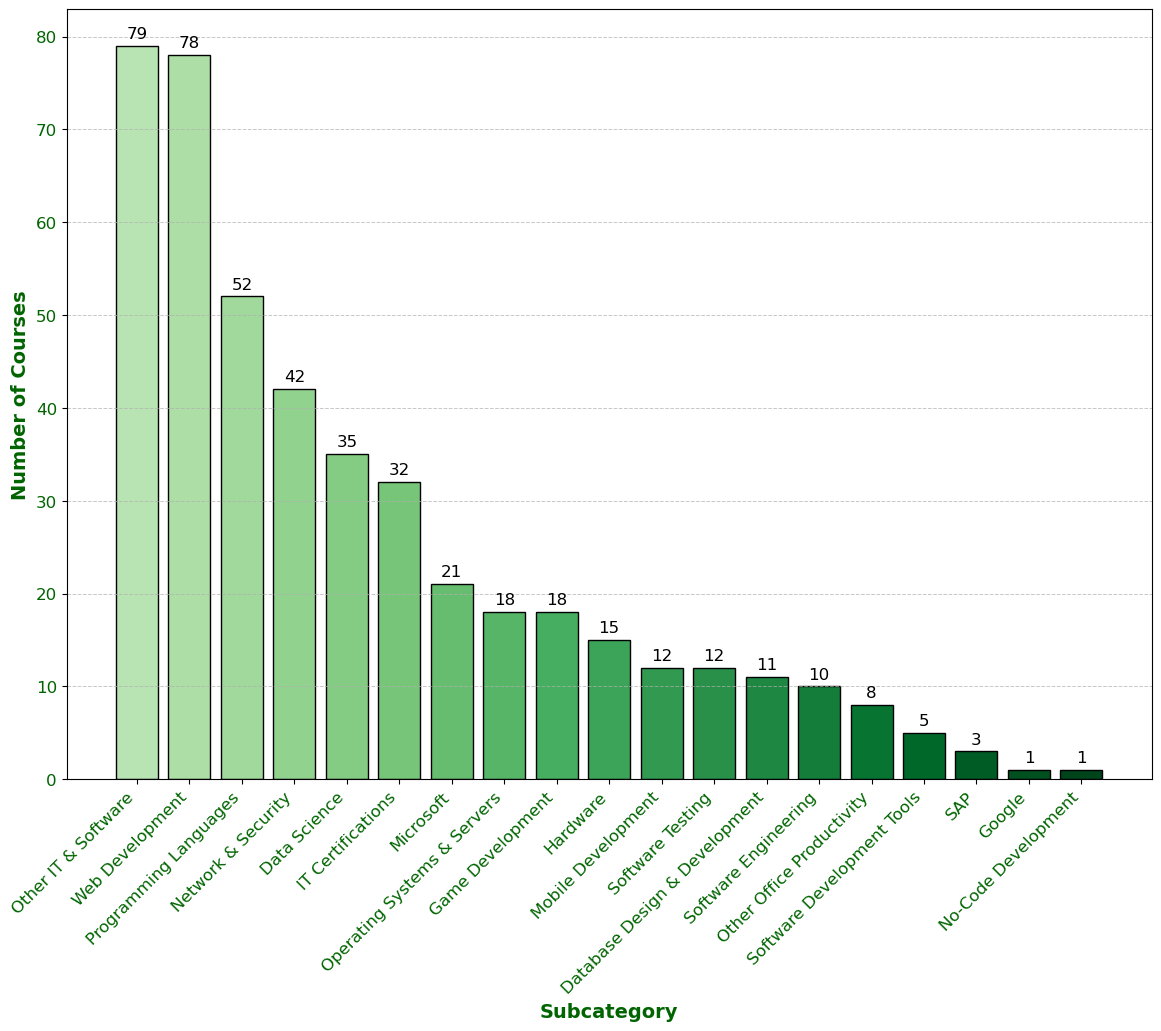

In [28]:
# Extracting the subcategory (second category)
udemy_courses_df['subcategory'] = udemy_courses_df['category'].apply(lambda x: x.split(',')[1] if len(x.split(',')) > 1 else 'Unknown')

# Filtering the data to include only the relevant broader categories
filtered_df = udemy_courses_df[udemy_courses_df['category'].str.contains('Development|IT & Software|Office Productivity')]

# Grouping the data by 'subcategory' and counting the number of courses
subcategory_course_counts = filtered_df.groupby('subcategory')['title'].count().sort_values(ascending=False)

# Setting up a green color map for the bars
colors = cm.Greens(np.linspace(0.3, 1, len(subcategory_course_counts)))

# Plotting the bar chart
plt.figure(figsize=(14, 10))
bars = plt.bar(subcategory_course_counts.index, subcategory_course_counts.values, color=colors, edgecolor='black')

# Adding labels and title with custom fonts
plt.xlabel('Subcategory', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Number of Courses', fontsize=14, fontweight='bold', color='darkgreen')
# plt.title('Number of Courses by Subcategory under Development, IT & Software, and Office Productivity', fontsize=16, fontweight='bold', color='darkgreen')

# Adding value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=12, color='black')

# Customizing the ticks
plt.xticks(rotation=45, ha="right", fontsize=12, color='darkgreen')
plt.yticks(fontsize=12, color='darkgreen')

# Adding a grid for better readability
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Display the plot
plt.show()

